## Shor's Algorithm
Developed by Peter Shor in 1994, Shor’s algorithm is a quantum algorithm for integer factorization that offers an exponential speedup over classical methods. It uses quantum period-finding to efficiently find factors of large numbers, which is infeasible for classical computers.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to create controlled modular exponentiation (simplified)
def controlled_mod_exp(qs, base, exponent, modulus, control, target):
    for _ in range(exponent):
        qs.cp(2 * 3.1415 / modulus, control, target)

# Parameters for the algorithm (simplified example)
N = 15  # Number to factorize (example: 15 = 3 * 5)
base = 7  # A base integer for the modular exponentiation

# Create a Quantum Circuit
qs = QuantumCircuit(4, 4)

# Apply Hadamard gates to the first three qubits to create superposition
qs.h([0, 1, 2])

# Perform controlled modular exponentiation
controlled_mod_exp(qs, base, 2, N, 0, 3)
controlled_mod_exp(qs, base, 4, N, 1, 3)
controlled_mod_exp(qs, base, 8, N, 2, 3)

# Apply the inverse Quantum Fourier Transform
qs.append(QFT(3, do_swaps=False).inverse(), [0, 1, 2])

# Measure the qubits
qs.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qs, simulator)
result = simulator.run(compiled_circuit).result()

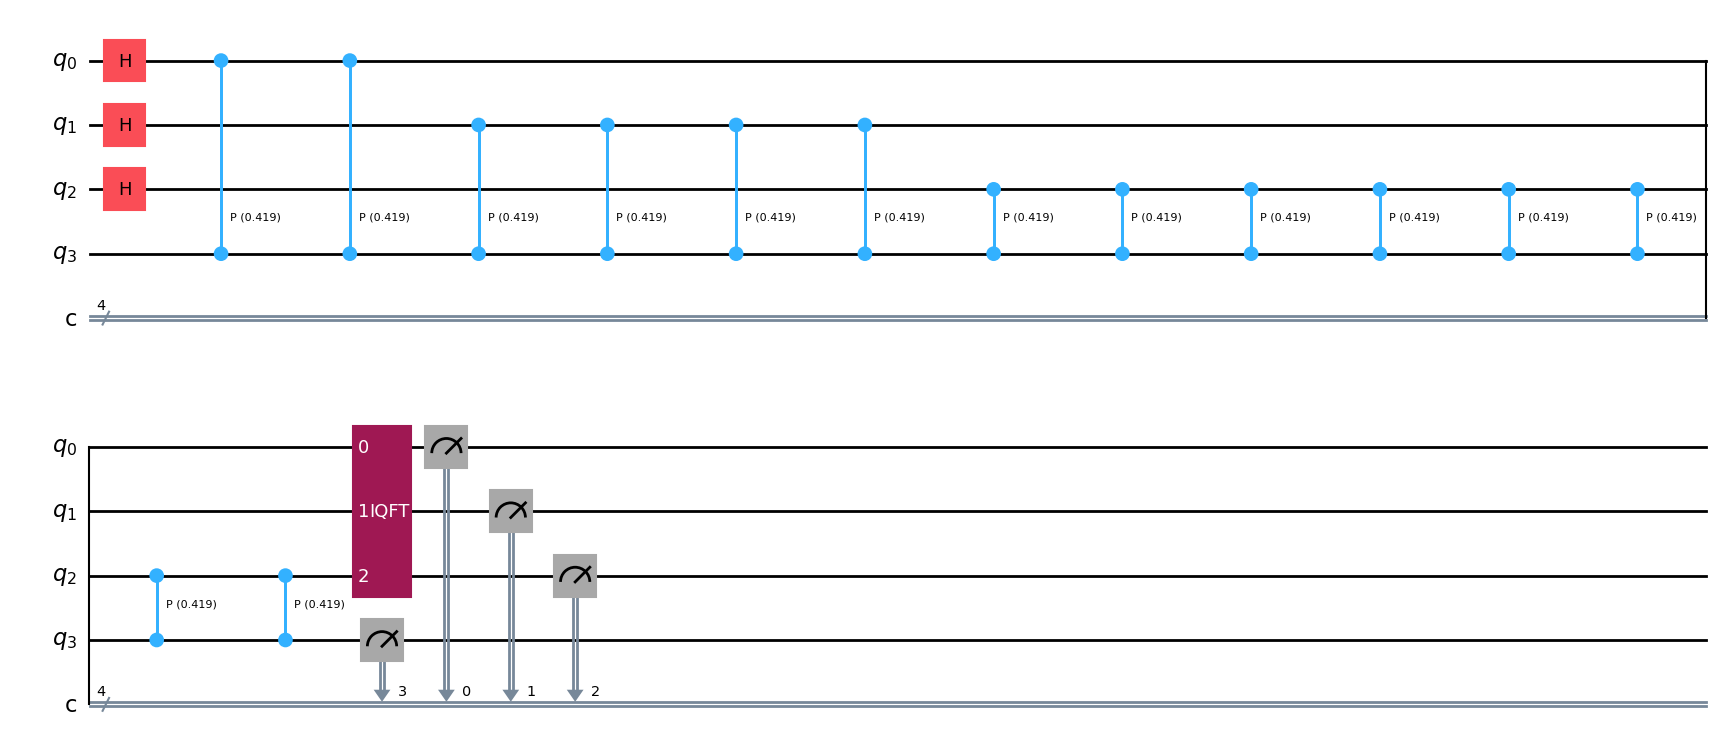

In [3]:
qs.draw('mpl')

Counts: {'0000': 1024}


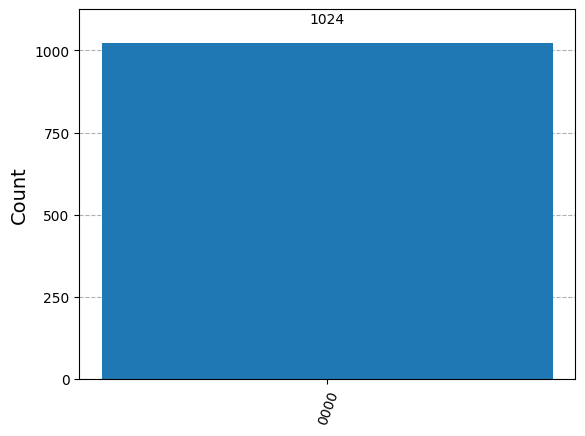

In [4]:
# Get the counts of outcomes
counts2 = result.get_counts()
print("Counts:", counts2)

# Visualize the results
plot_histogram(counts2)